In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#reading in data
train = pd.read_csv('../datasets/cleaned_train.csv', keep_default_na=False, na_values=[''])
test = pd.read_csv('../datasets/cleaned_test.csv', keep_default_na=False, na_values=[''])

In [3]:
problem_cols = ['Neighborhood', 'Condition 1', 'Condition 2', 'MS Zoning']
numeric_cols = train._get_numeric_data().columns
high_corr_cols = numeric_cols[train.corr()['SalePrice'] > .4]
num_cols = high_corr_cols.drop('SalePrice')
features = list(num_cols) + problem_cols

In [4]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7930366475735426, 0.852271771822531)

In [7]:
mean_squared_error(y_train, lr.predict(X_train))

1308943908.6155615

In [8]:
y_pred = lr.predict(X_test)

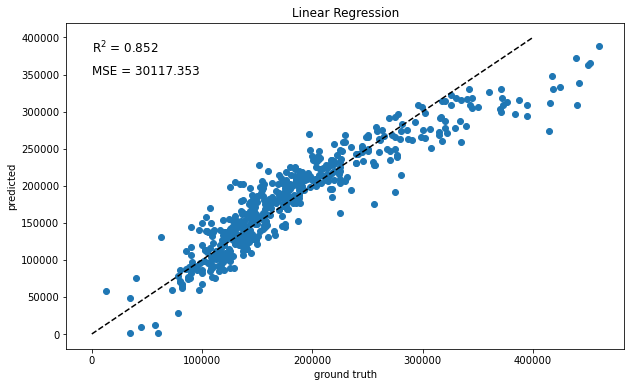

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Linear Regression');

In [10]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 19342.753506025074,
 'Year Built': 186.00440566866305,
 'Year Remod/Add': 399.10387245664685,
 'Mas Vnr Area': 36.35095930359498,
 'BsmtFin SF 1': 16.763471024403216,
 'Total Bsmt SF': 6.797896421546923,
 '1st Flr SF': 10.728221619662207,
 'Gr Liv Area': 30.87421988510168,
 'Full Bath': -1105.3020385067146,
 'TotRms AbvGrd': 3099.2683428288897,
 'Fireplaces': 8781.522630379173,
 'Garage Cars': 6235.401046810991,
 'Garage Area': 24.50300088878747}

-----------------------------

In [11]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
lr = RidgeCV()

In [13]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7930306629081882, 0.8524444630402294)

In [14]:
mean_squared_error(y_train, lr.predict(X_train))

1308981758.7526464

In [15]:
y_pred = lr.predict(X_test)

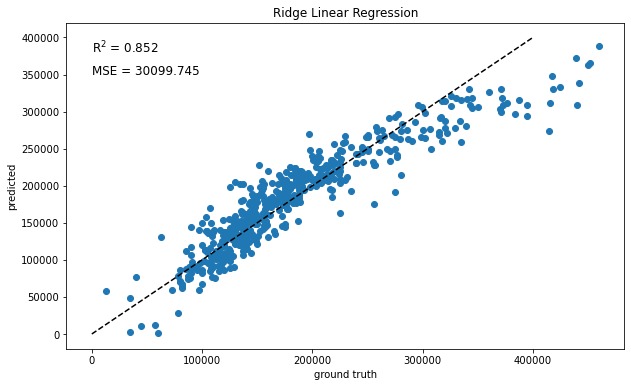

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Ridge Linear Regression');

In [17]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 19200.187751814257,
 'Year Built': 188.13573717555846,
 'Year Remod/Add': 401.2382249762304,
 'Mas Vnr Area': 36.51426191907376,
 'BsmtFin SF 1': 16.738350868225098,
 'Total Bsmt SF': 6.896069020032883,
 '1st Flr SF': 10.671835541725159,
 'Gr Liv Area': 31.140335977077484,
 'Full Bath': -1034.2382997328823,
 'TotRms AbvGrd': 3062.840951383172,
 'Fireplaces': 8659.773931973832,
 'Garage Cars': 5923.779896652644,
 'Garage Area': 25.53503994271159}

--------------------------------------

In [18]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
lr = LassoCV()

In [20]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7375246442263211, 0.8120754623304323)

In [21]:
mean_squared_error(y_train, lr.predict(X_train))

1660030696.6120605

In [22]:
y_pred = lr.predict(X_test)

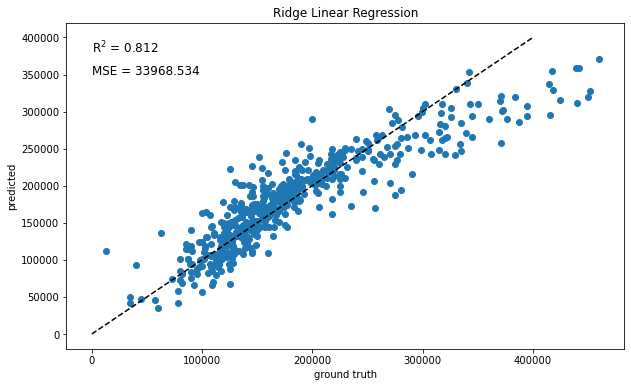

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Ridge Linear Regression');


In [24]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 0.0,
 'Year Built': 380.13803336791034,
 'Year Remod/Add': 632.8970901527391,
 'Mas Vnr Area': 55.15223506984344,
 'BsmtFin SF 1': 13.782513065345109,
 'Total Bsmt SF': 23.65878161945672,
 '1st Flr SF': 2.2624012329509555,
 'Gr Liv Area': 59.33647865896668,
 'Full Bath': 0.0,
 'TotRms AbvGrd': 0.0,
 'Fireplaces': 0.0,
 'Garage Cars': 0.0,
 'Garage Area': 63.041963184410136}

-----------------------------

In [25]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [27]:
X_train_pf = pf.transform(X_train)

In [28]:
X_test_pf = pf.transform(X_test)

In [29]:
lr = LinearRegression()
lr.fit(X_train_pf, y_train)

LinearRegression()

In [30]:
lr.score(X_train_pf, y_train), lr.score(X_test_pf, y_test)

(0.9139500103467071, 0.8904786484194871)

In [31]:
mean_squared_error(y_train, lr.predict(X_train_pf))

544224900.0732323

In [32]:
y_pred = lr.predict(X_test_pf)

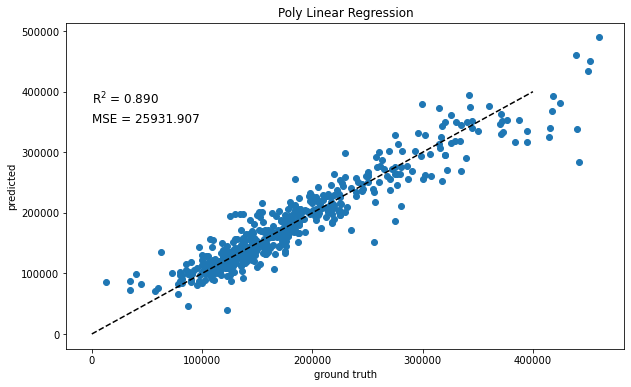

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test_pf, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Poly Linear Regression');